### Download Dataset from Kaggle

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,

import kagglehub
paramaggarwal_fashion_product_images_dataset_path = kagglehub.dataset_download('paramaggarwal/fashion-product-images-dataset')

print('Data source import complete.')


100%|██████████| 23.1G/23.1G [18:00<00:00, 22.9MB/s]

Extracting files...


Data source import complete.


In [2]:
print(paramaggarwal_fashion_product_images_dataset_path)

/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1


Explanation:
This downloads the fashion product images dataset from Kaggle using kagglehub. The variable paramaggarwal_fashion_product_images_dataset_path stores the dataset location on your system.

###  Mounting Google Drive to Access Dataset

* Imports the `drive` module from `google.colab`.

* Uses `drive.mount('/content/drive')` to connect your Google Drive with Colab.

* After running this, you'll be prompted to grant access and copy-paste an authorization code.

* Once mounted, you can access files and folders from your Drive using the `/content/drive/MyDrive/...` path.

* This step is necessary if your dataset or images are stored in your Google Drive.


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Explanation:
This connects your Google Drive to Colab so you can access images from your Drive.

In [4]:
drive_path = "/content/drive/MyDrive/fashion_dataset"


Explanation:
This defines a variable where your dataset images are stored in your Google Drive.



Selecting a Limited Number of Images from the Dataset


In [8]:
image_folder = "/kaggle/input/fashion-product-images-dataset/images"

Explanation

* Imports the `os` module to interact with the file system.

* Defines the path to the folder containing all fashion product images.

* Uses `os.listdir()` to get a list of all image file names in that folder.

* Selects only the first **40,000 images** using slicing (`[:40000]`).

* This is done to reduce processing time and memory usage in Google Colab.

* Helps ensure the project runs efficiently without slowing down or crashing.


Explanation:
This sets the folder path where your fashion images are located so the code can load them.

In [13]:
print(paramaggarwal_fashion_product_images_dataset_path)

/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1


In [14]:
import os

image_folder ="/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images"


image_files = sorted(os.listdir(image_folder))
print("Total images:", len(image_files))

selected_images = image_files[:40000]
print("Selected images:", len(selected_images))


Total images: 44441
Selected images: 40000


Reading & Selecting Image Files from Google Drive

* First, it imports the `os` module to interact with the file system.

* The variable `image_folder` stores the path where all fashion images are saved in Google Drive.

* `os.listdir(image_folder)` lists all image file names in that folder.





* Then, it uses slicing (`[:40000]`) to select only the first 40,000 images.

* This selection is stored in `selected_images` to avoid memory overload.

* Finally, it prints the number of selected images: 40,000


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Importing Required Libraries

* `cv2` → For reading, resizing, and processing images (OpenCV library).
* `numpy` → For handling arrays and numerical data.
* `matplotlib.pyplot` → For displaying images using `plt.imshow()` in the notebook.


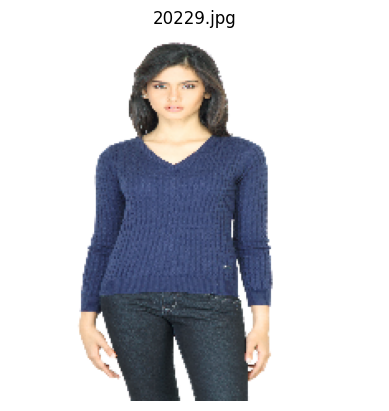

In [17]:
for image_name in selected_images:
    image_path = os.path.join(image_folder, image_name)

    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load: {image_name}")
        continue

    image = cv2.resize(image, (224, 224))

    # Example: Show first image only (optional)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(image_name)
    plt.axis('off')
    break  # just show one


Loading & Displaying the First Valid Image

* Loops through each image in `selected_images`.

* Builds the full path for each image using `os.path.join()`.

* Reads the image using `cv2.imread()`.

* If image loading fails (returns `None`), it prints an error and skips to the next.

* Resizes the image to **224x224 pixels**, which is the standard input size for many CNN models like ResNet/VGG.

* Displays the image using `matplotlib`:
  - Converts it from BGR (OpenCV default) to RGB (matplotlib format).
  - Adds the image name as the title.
  - Hides the axes.
  - `break` stops the loop after showing only **one image** (for testing).


In [18]:
import os

image_folder = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images"

image_files = [
    f for f in os.listdir(image_folder)
    if f.lower().endswith((".jpg", ".jpeg", ".png"))
]

print(f"Found {len(image_files)} image files in image folder.")


Found 44441 image files in image folder.


Explanation:

This downloads the fashion dataset from Kaggle using the kagglehub library and stores the path.

###Load and Prepare the Data


* Imports the `pandas` library, which is used for handling tabular data (CSV files, dataframes, etc.).

* Loads the CSV file (`styles.csv`) from the Kaggle dataset using `pd.read_csv()`.

* The argument `on_bad_lines='skip'` tells pandas to skip any rows in the CSV file that have formatting issues or errors.

* Limits the data to the first **6000 rows** using `df.head(6000)` to reduce memory usage and speed up testing.

* Selects only two important columns — `"id"` and `"articleType"` — for this project, since other columns are not needed for recommendation.

* Displays the first few rows using `df.head()` to preview the loaded data.


✅ Dataset path: /kaggle/input/fashion-product-images-dataset

* /kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv
* /kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv

In [19]:
import pandas as pd
import os

csv_path = os.path.join(
    paramaggarwal_fashion_product_images_dataset_path,
    "fashion-dataset",
    "styles.csv"
)

df = pd.read_csv(csv_path, on_bad_lines="skip")
df = df[["id", "articleType"]].head(6000)

df.head()


,id,articleType
0,15970,Shirts
1,39386,Jeans
2,59263,Watches
3,21379,Track Pants
4,53759,Tshirts


Ye cell check karta hai ke pehli image jo dataset me hai wo folder me waqayi maujood hai ya nahi. Agar path sahi ho to True print hota hai.

In [20]:
import os

base_path = paramaggarwal_fashion_product_images_dataset_path


image_folder = os.path.join(base_path, "fashion-dataset", "images")

# Pick first image id from dataframe
first_id = str(df.iloc[0]["id"])   # convert to string to be safe

# Build image path
image_path = os.path.join(image_folder, f"{first_id}.jpg")

# Check existence
print("Image path:", image_path)
print("Exists?", os.path.exists(image_path))


Image path: /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images/15970.jpg
Exists? True


 Verify Image File Exists

* Imports the `os` module to work with file paths and check file existence.

* Defines the `image_folder` path where all fashion product images are stored.

* Uses `df.iloc[0]["id"]` to get the first image ID from the DataFrame.

* Constructs the full image file path using `os.path.join()` and string formatting (`f"{first_id}.jpg"`).

* Checks whether the image file exists at that path using `os.path.exists()`.

* Prints `True` if the image is found in the folder, confirming that the image path and ID are correct.


In [23]:
import pandas as pd
import os

base_path = paramaggarwal_fashion_product_images_dataset_path


csv_path = os.path.join(
    base_path,
    "fashion-dataset",
    "styles.csv"
)

# Read CSV once
df = pd.read_csv(csv_path, on_bad_lines="skip", low_memory=False)

# Keep only needed columns
df = df[["id", "articleType"]].head(6000)

# Optional alias
categorydata = df

# Verify
print(categorydata.columns)
categorydata.head()


Index(['id', 'articleType'], dtype='object')


,id,articleType
0,15970,Shirts
1,39386,Jeans
2,59263,Watches
3,21379,Track Pants
4,53759,Tshirts


In [24]:
categorydata = df  # aliasing it

print(categorydata.columns)
categorydata.head()


Index(['id', 'articleType'], dtype='object')


,id,articleType
0,15970,Shirts
1,39386,Jeans
2,59263,Watches
3,21379,Track Pants
4,53759,Tshirts


In [25]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


Explanation:

Splits the dataset into 80% training and 20% testing for feature generation and evaluation.

We split our data into two parts:

1. Training set (80%) – used to train the model.

2. Testing set (20%) – used to check how well the model performs.



In [27]:
import os

for root, dirs, files in os.walk("/"):
    if "fashion-product-images-dataset" in root:
        print("Found dataset path:", root)
        break


Found dataset path: /root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset


Explanation:

This line stores the path to the folder that contains all the fashion product images. We’ll use this path later to load the actual image files.

Explanation:

This command shows the names of folders/files inside the main dataset directory. It helps you explore what’s available.



In [29]:
import os

image_folder ="/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images"

print("Sample images:", os.listdir(image_folder)[:5])


Sample images: ['20229.jpg', '30596.jpg', '30861.jpg', '47166.jpg', '42631.jpg']


Explanation:

This code:

1. Uses the os module to list files in the image folder.

2. Shows the first 5 image file names so you can use them later for testing.



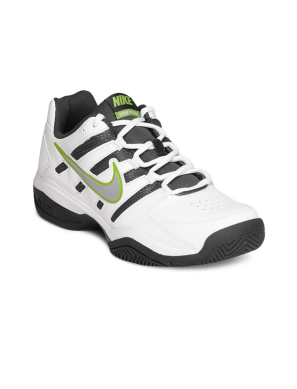

In [30]:
import cv2
import matplotlib.pyplot as plt

img_path = os.path.join(image_folder, "46803.jpg")  # replace with an actual image name from the list
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()


Sample Fashion Product Image

Explanation:

* This cell displays a real image from your dataset.

* You give it a filename like "46803.jpg" (from the list of image names shown earlier).

* OpenCV (cv2) loads the image.

* matplotlib.pyplot (plt) is used to show it.

* Colors are fixed using cv2.COLOR_BGR2RGB because OpenCV and Matplotlib use different color orders.

* You can change "20501.jpg" to any other image file name from your dataset to preview different items!

Sample Fashion Product Image 2

Explanation:

* This cell displays a real image from your dataset.

* You give it a filename like "20501.jpg" (from the list of image names shown earlier).

* OpenCV (cv2) loads the image.

* matplotlib.pyplot (plt) is used to show it.

* Colors are fixed using cv2.COLOR_BGR2RGB because OpenCV and Matplotlib use different color orders.

* You can change "20501.jpg" to any other image file name from your dataset to preview different items!

# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Image Recommender System Using Deep Approach</p>

<p style="text-align:center; ">
<img src="https://i0.wp.com/wideeyes.ai/wp-content/uploads/2019/03/similar-2.jpg?w=966&ssl=1" style='width: 600px; height: 330px;'>
</p>

<p style="text-align:justify; ">
A recommendation system is a machine learning algorithm that suggests products, services, events etc. to users based on analysis of data. It basically acts as a filter, which helps users to discover new products and services they would like. Every time that you use an online service or look for a product, a recommendation system is guiding you towards the product you are most likely to purchase. These system algorithms are like salesmen, who know what you would be interested in based on your history and preferences.
<br><br>
It is imperative to have these system algorithms, since most of the users are overwhelmed by the range of e-commerce services and need reliable help to find what they’re looking for. This leads to happy customers and obviously more sales. Here we will implement fashion products recommender system using deep approach.
     
</p>    

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:130%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table Of Contents</p>   
    

    
|No  | Contents |No  | Contents  |No  | Contents  |
|:---| :---     |:---| :----     |:---| :----     |
|1   | [<font color="#092434"> Importing Libraries</font>](#1)             |5   | [<font color="#092434"> Data Preprocessing</font>](#5)                |9   | [<font color="#092434"> Feature Generation</font>](#9) |
|2   | [<font color="#092434"> About Dataset</font>](#2)                   |6   | [<font color="#092434"> Customization For Visualization</font>](#6)        |10   | [<font color="#092434"> Recommender Engine</font>](#10) |
|3   | [<font color="#092434"> Basic Exploration</font>](#3)               |7  | [<font color="#092434"> Dataset Splitting</font>](#7)       |11   | [<font color="#092434"> Thank You</font>](#11)  |     
|4   | [<font color="#092434"> Dataset Summary</font>](#4)                 |8  | [<font color="#092434"> Model Creation</font>](#8)                                  
       
           


# Importing Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing import image
import cv2
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics.pairwise import cosine_similarity



from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess





We are importing all the important Python libraries required to build our **AI-powered image recommender system**.

📊 Data Handling & Visualization
* `numpy`, `pandas` – For handling arrays and dataframes  
* `matplotlib.pyplot`, `seaborn` – For plotting graphs and displaying images

🤖 Deep Learning & Image Processing
* `tensorflow`, `keras`, `layers`, `Model`, `image` – For using deep learning models and processing images  
* `cv2` – From OpenCV, used to load and manipulate images  
* `pickle` – For saving/loading feature vectors or models later

📏 Similarity Calculation
* `cosine_similarity` – From `sklearn`, used to calculate how similar two images are (based on feature vectors)

⚠️ Warning Handling
* `warnings` – Used to hide unnecessary warning messages from the notebook

🧠 Pre-trained CNN Models
We are importing popular pre-trained image classification models from Keras:

* `ResNet50`  
* `VGG16`  
* `InceptionV3`  
* `MobileNet`  
* `DenseNet121`

These models are **already trained on ImageNet** and will be used for **feature extraction**, which is the core of how image recommendation will work.


<a id="2"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About Dataset</p>

This dataset contains two folders and two csv files.<br><br>
**Folders:**
* **images:** Contains 44.4K images of products<br>
* **styles:** Contains 44.4K metadatas of products



**CSV Files:**
* **images.csv**
 * **filename:** Unique id value of product's image
 * **link:** Link of the image


* **styles.csv**
 * **id:** Unique id value of product's image
 * **gender:** Product used by gender
 * **masterCategory:** Master category of the product
 * **subCategory:** Sub category under master category of the product
 * **articleType:** Name/Type of the product
 * **baseColour:** Color of the product
 * **season:** Season of the usage of the product
 * **year:** Year of usage of the product
 * **usage:** Usage type of the product
 * **productDisplayName:** Display name of the product


# Basic Exploration of code

In [35]:
import pandas as pd
import os

# ✅ Use kagglehub base path
base_path = paramaggarwal_fashion_product_images_dataset_path

# ✅ Correct CSV path
csv_path = os.path.join(
    base_path,
    "fashion-dataset",
    "styles.csv"
)

# Load limited rows for efficiency
datacsv = pd.read_csv(
    csv_path,
    on_bad_lines="skip",
    nrows=6000,
    low_memory=False
)

# Select required columns
categorydata = datacsv[["id", "articleType"]]

# Verify
print(categorydata.columns)
categorydata.head()


Index(['id', 'articleType'], dtype='object')


,id,articleType
0,15970,Shirts
1,39386,Jeans
2,59263,Watches
3,21379,Track Pants
4,53759,Tshirts


This cell performs the initial loading and filtering of the dataset:

pandas is imported to handle tabular data.

The path to the CSV file (styles.csv) is stored in csv_path.

pd.read_csv() reads the CSV file, with:

on_bad_lines='skip': skips rows with formatting errors.

nrows=6000: limits loading to the first 6,000 rows to speed things up.

The code selects only two columns — "id" and "articleType" — and stores them in a new DataFrame called categorydata.

📌 Purpose:
To load only the useful part of the dataset (image IDs and product types) for later use in feature extraction and recommendation.

This cell continues from the previous one and adds display/visualization:

Again loads the same CSV and selects "id" and "articleType" columns (same as before).

Then:

* It prints the number of rows and columns using .shape.

* It prints a message saying that 6K items were loaded.

Displays the first 10 rows of the dataset using .head(10) with custom styling using .style.set_properties() to make the output look nicer.

📌 Purpose:
To confirm that the dataset loaded correctly and give the user a quick, styled preview of the first few rows.

In [ ]:
print(f"Informations of the dataset :\n")
print(categorydata.info())

What it does:


Uses categorydata.info() to display basic information about the dataset.


Shows:

* Total number of entries (6000 rows)

* Column names: id and articleType

Data types: int64 for IDs, object (i.e., string) for categories

Memory usage

Confirms there are no missing values in either column (both have 6000 non-null entries)

📌 Purpose: To check dataset structure, types, and if any values are missing.



<a id="4"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Summary</p>

In [36]:
print(f"Summary of the dataset :")
categorydata.describe().T.style.set_properties(**{"background-color": "#ddab46","color":"#092434","border": "1.5px #ddab46"})

Summary of the dataset :


,count,mean,std,min,25%,50%,75%,max
id,6000.000000,29903.574167,17106.262875,1607.000000,14866.750000,28796.000000,44923.250000,59988.000000


Your dataset categorydata has only two columns:


* ["id", "articleType"]
* id → numeric column (int64)
* articleType → text/categorical column (object)

Now, when you run:

* categorydata.describe()

By default, pandas:

* Automatically includes only numeric columns when no parameter is passed.

* So it will only summarize id (since it's the only numeric column).

That's why it shows:

* count, mean, std, min, max → only for the id column.



What it does:

* Generates a summary of the numeric column id (like count, mean, min, max, etc.).

* Uses .T to transpose the table for better readability.

* Applies background and text color styling using .style.set_properties().

📌 Purpose: To quickly understand how the numeric values (image IDs) are distributed and make the output visually attractive for presentation.



In [37]:
categorydata.describe(include="object").T.style.set_properties(**{"background-color": "#ddab46","color":"#452912","border": "1.5px #ddab46"})

,count,unique,top,freq
articleType,6000,117,Tshirts,900


What it does:

Shows summary statistics for categorical columns, specifically articleType.

Tells you:

* Total number of entries (count = 6000)

* Unique categories (117)

* Most common category (Tshirts) with frequency (900)

📌 Purpose: To explore category distribution and identify the most frequent fashion item types.

In [38]:
dup = categorydata[categorydata.duplicated()].shape[0]
print(f"There is {dup} duplicate entry among {categorydata.shape[0]} entries in this dataset.")

categorydata.drop_duplicates(keep="first",inplace=True)
print(f"After removing duplicate entries there are {categorydata.shape[0]} entries in this dataset.")

There is 0 duplicate entry among 6000 entries in this dataset.
After removing duplicate entries there are 6000 entries in this dataset.


In [39]:
print(f"Null values of the Dataset :")
categorydata.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#ddab46","color":"#452912","border": "1.5px #ddab46"})

Null values of the Dataset :


,id,articleType
0,0,0


**Insights:**

* There is no duplicate values in this dataset.
* There is no missing values in this dataset.


<a id="5"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data Preprocessing</p>

In [40]:
categorydata = categorydata.groupby(["articleType"], sort=True).size().reset_index(name="Total")
categories = categorydata["articleType"].tolist()
print(f"The shape of the category data is {categorydata.shape}.")
print(f"There are {len(categories)} categories.")
print(f"The categories are :\n\n{categories}")

The shape of the category data is (117, 2).
There are 117 categories.
The categories are :

['Accessory Gift Set', 'Baby Dolls', 'Backpacks', 'Bangle', 'Bath Robe', 'Beauty Accessory', 'Belts', 'Blazers', 'Boxers', 'Bra', 'Bracelet', 'Briefs', 'Camisoles', 'Capris', 'Caps', 'Casual Shoes', 'Churidar', 'Clutches', 'Compact', 'Cufflinks', 'Deodorant', 'Dresses', 'Duffel Bag', 'Dupatta', 'Earrings', 'Eye Cream', 'Eyeshadow', 'Face Moisturisers', 'Face Scrub and Exfoliator', 'Face Wash and Cleanser', 'Flats', 'Flip Flops', 'Footballs', 'Formal Shoes', 'Foundation and Primer', 'Fragrance Gift Set', 'Free Gifts', 'Gloves', 'Handbags', 'Headband', 'Heels', 'Highlighter and Blush', 'Innerwear Vests', 'Jackets', 'Jeans', 'Jeggings', 'Jewellery Set', 'Jumpsuit', 'Kajal and Eyeliner', 'Kurta Sets', 'Kurtas', 'Kurtis', 'Laptop Bag', 'Leggings', 'Lip Care', 'Lip Gloss', 'Lip Liner', 'Lipstick', 'Lounge Pants', 'Lounge Shorts', 'Lounge Tshirts', 'Mask and Peel', 'Messenger Bag', 'Mobile Pouch', 'Muf

In [41]:
print("After preprocessing, let's have a glimpse of the category dataset :")
categorydata.head(10).T.style.set_properties(**{"background-color": "#ddab46","color":"#452912","border": "1.5px #ddab46"})

After preprocessing, let's have a glimpse of the category dataset :


,0,1,2,3,4,5,6,7,8,9
articleType,Accessory Gift Set,Baby Dolls,Backpacks,Bangle,Bath Robe,Beauty Accessory,Belts,Blazers,Boxers,Bra
Total,8,2,94,11,4,1,112,1,5,87


<a id="6"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Customization For Visualization</p>

In [42]:
sns.set_style("white")
sns.set(
    rc={
        "axes.facecolor": "#e3be77",      # background color of plot area
        "figure.facecolor": "#e3be77",    # background color of the whole figure
        "axes.grid": False,               # disables grid lines
        "grid.color": "black",            # color of grid lines (if enabled)
        "axes.edgecolor": "black",        # color of border around the plot
        "grid.linestyle": u"-",           # style of grid line (solid line)
        "axes.labelcolor": "black",       # color of axis labels
        "font.family": [u"DejaVu Sans"],  # sets the font type
        "text.color": "black",            # color of general text
        "xtick.labelbottom": False,       # hides x-axis tick labels
        "xtick.color": "black",           # x-axis tick color
        "ytick.labelleft": False,         # hides y-axis tick labels
        "ytick.color": "black",           # y-axis tick color
        "legend.facecolor": "#e3be77",    # background of legend box
        "legend.frameon": True,           # enables border around legend
        "legend.edgecolor": "black"       # color of border around legend
    }
)
sns.set_context("poster", font_scale=0.7)


What this does:
Customizes the visual style of Seaborn plots to match a specific color scheme (#e3be77 = peach/light tan).

Removes extra elements like gridlines and axis tick labels for a clean and minimal visual.

Applies a large-sized poster context (for presentations) with smaller font using font_scale=0.7.

📌 Purpose:
To make your plots aesthetically pleasing and match the overall theme of your project visuals or presentation style.



```
# This is formatted as code
```

upar jayega


In [43]:
categorydata = datacsv[["id", "articleType"]].head(6000)
print(categorydata.columns)


Index(['id', 'articleType'], dtype='object')


In [44]:
print(categorydata.columns)


Index(['id', 'articleType'], dtype='object')


<a id="7"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Dataset Splitting</p>

In [46]:
from sklearn.model_selection import train_test_split


To prepare separate data for training your model and testing its performance.



In [47]:
train_data, test_data = train_test_split(categorydata, test_size=0.2, random_state=42)


In [48]:
from sklearn.model_selection import train_test_split

# Split the full dataset (not just id + articleType)
train_data, test_data = train_test_split(datacsv, test_size=0.2, random_state=42)

# Print info
print("After splitting, let's have a glimpse of the training dataset :")
print(f"Shape of the training dataset is {train_data.shape}.")

# Styled preview
train_data.head().style.set_properties(**{
    "background-color": "#ddab46",
    "color": "#452912",
    "border": "1.5px #ddab46"
})


After splitting, let's have a glimpse of the training dataset :
Shape of the training dataset is (4800, 10).


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
3897,1854,Men,Apparel,Topwear,Tshirts,Purple,Summer,2011,Casual,Inkfruit Mens Pencho T-shirt
5628,44861,Men,Apparel,Topwear,Tshirts,Green,Summer,2012,Casual,Puma Men Green T-shirt
1756,22760,Women,Apparel,Topwear,Kurtas,Blue,Fall,2011,Ethnic,BIBA Women Solid Navy Blue Kurta
2346,33885,Men,Accessories,Watches,Watches,Steel,Winter,2016,Casual,Citizen Men Steel Eco-Drive Watch
2996,20065,Women,Accessories,Belts,Belts,Black,Fall,2011,Casual,United Colors of Benetton Women Solid Black Belt


What it does:

Splits the entire dataset (datacsv) instead of only selected columns.

* Prints the shape of the training dataset to confirm the split.

* Displays the first 5 rows of training data using .head() with visual styling to make it presentation-friendly.

📌 Purpose:
To confirm that the training data has been created successfully and to preview its structure in a styled format.

In [49]:
from sklearn.model_selection import train_test_split

# Split the full dataset (e.g., datacsv)
train_data, test_data = train_test_split(datacsv, test_size=0.2, random_state=42)

# Display test dataset shape
print("After splitting, let's have a glimpse of the testing dataset :")
print(f"Shape of the testing dataset is {test_data.shape}.")

# Styled DataFrame preview
test_data.head().style.set_properties(**{
    "background-color": "#ddab46",  # golden yellow
    "color": "black",
    "border": "1px solid black"
})


After splitting, let's have a glimpse of the testing dataset :
Shape of the testing dataset is (1200, 10).


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
1782,14030,Women,Apparel,Topwear,Tshirts,White,Fall,2011,Casual,Nike Women Printed White Tshirts
3917,38631,Women,Apparel,Topwear,Tshirts,Pink,Summer,2012,Casual,Nike Women Pink Polo T-shirt
221,26163,Men,Apparel,Bottomwear,Trousers,Grey,Summer,2012,Formal,John Miller Men Dark Grey Trousers
2135,7134,Men,Apparel,Bottomwear,Track Pants,Navy Blue,Fall,2011,Casual,Urban Yoga Men Bottom Navy Yoga Pants
5224,1697,Unisex,Accessories,Bags,Backpacks,Black,Fall,2010,Sports,Puma Deck Black Backpack


<a id="8"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Model Creation</p>

We will use pre-trained resnet model for this project.

In [51]:
def resnetmodel(height, width):
    model = ResNet50(weights="imagenet", include_top=False, input_shape = (height, width, 3))
    model.trainable = False
    output = layers.GlobalMaxPooling2D()(model.outputs)
    model = Model(inputs=model.inputs, outputs=output)
    model.summary()
    return model


What it does:
Defines a custom function resnetmodel() that creates a feature extractor using the pretrained ResNet50 model.

Loads ResNet50 with:

* weights="imagenet" → pretrained on ImageNet dataset.

* include_top=False → excludes final classification layer so we can use it for feature extraction.

* Sets model.trainable = False to freeze all layers (no training).

* Adds a Global Max Pooling layer to reduce the output size into a fixed feature vector.

Wraps it as a new Keras model and prints its architecture.

📌 Purpose:
To prepare a ready-to-use frozen CNN model for extracting features from images.

In [52]:
# 2️⃣ Choose the model here
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess

model_choice = "resnet"  # or "vgg"

if model_choice == "resnet":
    model = resnetmodel(224, 224)
    preprocess = resnet_preprocess

elif model_choice == "vgg":
    model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    preprocess = vgg_preprocess


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

🔍 What it does:
Imports preprocessing functions for both ResNet and VGG models.

Allows switching between "resnet" and "vgg" using model_choice.

Based on the choice:

* Initializes the respective model (resnetmodel() or vggmodel())

* Assigns the appropriate preprocessing method.

📌 Purpose:
To provide a flexible way to switch between different pretrained models and their preprocessing functions.

In [54]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Correct image folder (Kaggle)
image_folder = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images"

# Take a valid image id from categorydata
sample_id = str(categorydata.iloc[0]["id"])

# Build image path
img_path = os.path.join(image_folder, f"{sample_id}.jpg")

# Load image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

# Expand dims for model input
print(f"Shape before expanding: {img_array.shape}")
img_array = np.expand_dims(img_array, axis=0)
print(f"Shape after expanding: {img_array.shape}")


Shape before expanding: (224, 224, 3)
Shape after expanding: (1, 224, 224, 3)


Image Preprocessing Explanation

* We first set the path to an image and load it using `image.load_img()`, resizing it to (224, 224).  
* Then we convert the image to a NumPy array using `image.img_to_array()` so the model can understand it.  
* Finally, we expand the dimensions using `np.expand_dims()` to make it compatible with the model, as it expects a batch of images.

**Before shape:** (224, 224, 3)  
**After shape:** (1, 224, 224, 3)


<a id="9"></a>
# <p style="padding:10px;background-color:#1c1c1c;margin:0;color:#ddab46;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Generation</p>


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#ddab46;font-size:200%;font-weight: 500;color:#1c1c1c;overflow:hidden;">ㅤSingle Feature Vectorㅤ</span>

In [55]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

# Load model without the final classification layer
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


This is a pre-trained CNN model from the ImageNet library that you're using to extract features from images. You’re not training this model — you're just using it as a feature extractor.

In [56]:
def getfeaturevector(model, image):
    # Convert to float32 and preprocess
    image = image.astype('float32')
    image = preprocess_input(image)

    # ✅ Only add batch dimension ONCE
    if len(image.shape) == 3:
        image = np.expand_dims(image, axis=0)

    # Extract features
    featurevector = model.predict(image)

    return featurevector.flatten()


getfeaturevector(model, image)

* Converts to float32

* Applies ResNet’s preprocess

* Adds batch dimension

* Runs prediction

* Returns a flat vector

In [57]:

feature = getfeaturevector(model, img_array)
print("Extracted feature vector shape:", feature.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Extracted feature vector shape: (100352,)


instead of classifying it, we remove the top layer of the model and only get the feature vector — which is like a numerical fingerprint of the image.

Ye feature vector batata hai ke image kis type ki hai — isme patterns, colors, aur shapes ka summary hota hai.

Baad mein, hum in vectors ko compare karte hain using cosine similarity taake hum similar images recommend kar saken.

In [58]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

# Load pretrained model (you can change to ResNet50, MobileNet, etc.)
model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


This block that loads a sample image and tests feature extraction



In [59]:
import os
import cv2

# Set your image ID (from your CSV)
image_id = "15970"  # Or any valid one from your datacsv['id']

# Correct full path to the image
img_path = os.path.join(
    paramaggarwal_fashion_product_images_dataset_path,
    "fashion-dataset",
    "images",
    f"{image_id}.jpg"
)

# Load image safely
# Load image safely
image = cv2.imread(img_path)

if image is None:
    print(f"❌ Image not found or couldn't be read: {img_path}")
else:
    # ✅ Resize to (224, 224) for ResNet or VGG16
    image = cv2.resize(image, (224, 224))

    # ✅ Continue with feature extraction
    featurevector = getfeaturevector(model, image)
    print(f"✅ Shape of the feature vector: {featurevector.shape}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
✅ Shape of the feature vector: (25088,)


In [60]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as resnet_preprocess


In [61]:
def resnetmodel(height, width):
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(height, width, 3))
    base_model.trainable = False
    output = layers.GlobalMaxPooling2D()(base_model.output)
    model = Model(inputs=base_model.input, outputs=output)
    return model

# Example usage:
model_choice = "resnet"  # or "vgg"

if model_choice == "resnet":
    model = resnetmodel(224, 224)
    preprocess = resnet_preprocess
elif model_choice == "vgg":
    model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    preprocess = vgg_preprocess


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#ddab46;font-size:200%;font-weight: 500;color:#1c1c1c;overflow:hidden;">ㅤAll Feature Vectorsㅤ</span>

 Split Data & Generate Test Features

In [62]:
import tensorflow as tf
import os
import numpy as np

def generatefeatures_fast(model, data, preprocess, image_folder, batch_size=64):

    image_paths = []
    labels = []
    ids = []

    for _, row in data.iterrows():
        img_id = str(row["id"])
        img_path = os.path.join(image_folder, f"{img_id}.jpg")

        if os.path.exists(img_path):
            image_paths.append(img_path)
            labels.append(row["articleType"])
            ids.append(img_id)

    def load_and_preprocess(path):
        img = tf.io.read_file(path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, (224, 224))
        img = preprocess(img)
        return img

    ds = tf.data.Dataset.from_tensor_slices(image_paths)
    ds = ds.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    features = model.predict(ds, verbose=1)
    features = features.reshape(features.shape[0], -1)

    return features, np.array(labels), np.array(ids)


In [64]:
import numpy as np

# ✅ Create the directory if not exists
import os
save_path = "/content/drive/MyDrive/fashion_features"
os.makedirs(save_path, exist_ok=True)

# ✅ Save test features
np.save(f"{save_path}/test_features.npy", test_features)
np.save(f"{save_path}/test_labels.npy", test_labels)
np.save(f"{save_path}/test_ids.npy", test_ids)

print("✅ Test features saved successfully.")


✅ Test features saved successfully.


#generatefeatures() Function





In [65]:
def generatefeatures(model, data, preprocess, image_folder):
    import os
    import numpy as np
    import cv2
    from tqdm import tqdm

    image_labels = []
    image_features = []
    image_ids = []

    for index, row in tqdm(data.iterrows(), total=len(data)):
        imageid = row["id"]
        image_file = os.path.join(image_folder, str(imageid) + ".jpg")

        if not os.path.exists(image_file):
            print(f"[{index}] File not found: {image_file}")
            continue

        image = cv2.imread(image_file)
        if image is None:
            print(f"[{index}] Failed to read image: {image_file}")
            continue

        try:
            image = cv2.resize(image, (224, 224))
            image = preprocess(image)  # Apply the passed preprocessing
            image = np.expand_dims(image, axis=0)
            featurevector = model.predict(image, verbose=0)[0]
            image_features.append(featurevector)
            image_labels.append(row["articleType"])
            image_ids.append(imageid)
        except Exception as e:
            print(f"[{index}] Error processing {imageid}: {e}")
            continue

    return np.array(image_features), image_labels, image_ids


Feature Generation Explanation

This function generates feature vectors for all images in the dataset using a pretrained model.

1. It loops through each row of the given data (which includes image IDs and labels).
2. It builds the image file path using the ID and reads the image using OpenCV (`cv2`).
3. It resizes the image to 224x224 (required input size for the model).
4. It applies the required preprocessing (like normalization) to prepare the image.
5. It expands the dimensions of the image to match the model input shape (1, 224, 224, 3).
6. It then predicts the feature vector using the model and stores it along with its label and ID.

This process converts raw images into meaningful numerical features that can be used for comparison or recommendation.


#2. Running the Function

✔️ This triggers full extraction for all images in both train/test.



✅ Image loaded.


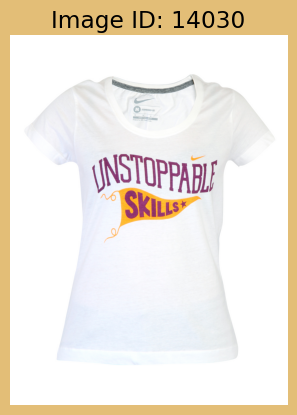

In [67]:
import cv2
import matplotlib.pyplot as plt
import os

# Correct Kaggle image folder
image_folder = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images"

# Use a valid image id (better: from saved ids)
image_id = str(test_ids[0])   # guaranteed existing image

# Build correct path
image_path = os.path.join(image_folder, f"{image_id}.jpg")

# Read image
img = cv2.imread(image_path)

if img is None:
    print("❌ Image failed to load:", image_path)
else:
    print("✅ Image loaded.")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Image ID: {image_id}")
    plt.axis("off")
    plt.show()


In [69]:
train_features, train_labels, train_ids = generatefeatures_fast(
    model,
    train_data,
    preprocess,
    image_folder,
    batch_size=64
)


75/75 ━━━━━━━━━━━━━━━━━━━━ 74s 979ms/step


In [70]:
import numpy as np

np.save("/content/drive/MyDrive/fashion_features/train_features.npy", train_features)
np.save("/content/drive/MyDrive/fashion_features/train_labels.npy", train_labels)
np.save("/content/drive/MyDrive/fashion_features/train_ids.npy", train_ids)

print("✅ Training features saved.")


✅ Training features saved.


In [71]:
import os
os.makedirs("/content/drive/MyDrive/fashion_features", exist_ok=True)


Created the folder fashion_features inside your Drive

Load features back later




In [72]:
import numpy as np

features = np.load("/content/drive/MyDrive/fashion_features/train_features.npy")
labels = np.load("/content/drive/MyDrive/fashion_features/train_labels.npy", allow_pickle=True)
ids = np.load("/content/drive/MyDrive/fashion_features/train_ids.npy", allow_pickle=True)


In [73]:
train_data, test_data = train_test_split(categorydata, test_size=0.2, random_state=42)


In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ✅ Show one image (from test set)
def showimage(testid, imagelabel):
    imagepath = "/content/drive/MyDrive/fashion_dataset/fashion-dataset/images/"
    image = cv2.imread(imagepath + str(int(testid)) + ".jpg")
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(image)
        plt.title(f"{imagelabel}")
        plt.axis("off")
        plt.show()
    else:
        print(f"❌ Could not load image: {testid}")

# ✅ Show 5 similar recommendations
def showrecommendations(trainindex, train_ids):
    imagepath = "/content/drive/MyDrive/fashion_dataset/fashion-dataset/images/"
    ids = [train_ids[i] for i in trainindex]

    fig, axs = plt.subplots(1, 5, figsize=(20, 8))
    for i, ax in enumerate(axs.flatten()):
        sim_path = imagepath + str(int(ids[i])) + ".jpg"
        sim_image = cv2.imread(sim_path)
        if sim_image is not None:
            sim_image = cv2.cvtColor(sim_image, cv2.COLOR_BGR2RGB)
            ax.imshow(sim_image)
            ax.set_title("You may also like")
            ax.axis("off")
        else:
            ax.set_title("Image not found")
            ax.axis("off")

# ✅ Get the most frequent label in KNN result
def getpredictedresult(trainindex, trainlabels):
    result = {}
    for index in trainindex:
        classid = trainlabels[index]
        result[classid] = result.get(classid, 0) + 1
    return max(result, key=result.get)

# ✅ KNN logic and visual results
def KNNmodel(trainfeatures, trainlabels, train_ids, testfeatures, testlabels, test_ids, k=5):
    truelabels = []
    predictedlabels = []

    # Normalize vectors for cosine similarity
    a_norm = np.linalg.norm(testfeatures, axis=1, keepdims=True)
    b_norm = np.linalg.norm(trainfeatures, axis=1, keepdims=True)
    similarity = np.dot(testfeatures, trainfeatures.T) / (a_norm * b_norm.T)

    # Pick a few test image indices to demonstrate
    imgids = [1, 4, 150, 700, 1000]

    for i in imgids:
        testclasslabel = testlabels[i]
        truelabels.append(testclasslabel)

        # Show the original test image
        showimage(test_ids[i], testclasslabel)

        # Find k most similar images from training set
        traindistance = similarity[i]
        trainindex = traindistance.argsort()[-k:]  # top k

        # Show similar images
        showrecommendations(trainindex, train_ids)

        # Predict label based on k neighbors
        result = getpredictedresult(trainindex, trainlabels)
        predictedlabels.append(result)

    return truelabels, predictedlabels


In [75]:
def showimage(testid, imagelabel):
    imagepath = "/content/drive/MyDrive/fashion_dataset/fashion-dataset/images/"
    image = cv2.imread(imagepath + str(int(testid)) + ".jpg")
    if image is not None:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.imshow(image)
        plt.title(f"Original: {imagelabel}")
        plt.axis('off')
        plt.show()
    else:
        print("Image not found.")

def showrecommendations(trainindex):
    fig, axs = plt.subplots(1, 5, figsize=(20, 8))
    for i, ax in enumerate(axs.flatten()):
        imageid = train_ids[trainindex[i]]
        imagepath = "/content/drive/MyDrive/fashion_dataset/fashion-dataset/images/" + str(int(imageid)) + ".jpg"
        image = cv2.imread(imagepath)
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            ax.imshow(image)
            ax.set_title(f"You may also like")
            ax.axis('off')
        else:
            ax.set_title("Image not found")
            ax.axis('off')

def getpredictedresult(trainindex, trainlabels):
    result = {}
    for index in trainindex:
        label = trainlabels[index]
        result[label] = result.get(label, 0) + 1
    return max(result, key=result.get)

def KNNmodel(trainfeatures, trainlabels, testfeatures, testlabels, k=5):
    truelabels = []
    predictedlabels = []

    print("📌 Generating similarity matrix...")
    test_norm = np.linalg.norm(testfeatures, axis=1, keepdims=True)
    train_norm = np.linalg.norm(trainfeatures, axis=1, keepdims=True).T
    similarity = np.dot(testfeatures, trainfeatures.T) / (test_norm @ train_norm)

    imgids = [2, 4, 157, 700, 1000, 355]  # Feel free to change test indexes
    for i in imgids:
        testclasslabel = testlabels[i]
        truelabels.append(testclasslabel)

        showimage(test_ids[i], testclasslabel)

        sim_scores = similarity[i]
        nearest_indices = sim_scores.argsort()[-k:][::-1]

        showrecommendations(nearest_indices)

        predictedlabel = getpredictedresult(nearest_indices, trainlabels)
        predictedlabels.append(predictedlabel)

    return truelabels, predictedlabels


In [76]:
def loadtrainfeatures(modelname):
    trainset = loadfrompickle(modelname + "_train.pkl")
    return trainset[0], trainset[1], trainset[2]

def loadtestfeatures(modelname):
    testset = loadfrompickle(modelname + "_test.pkl")
    return testset[0], testset[1], testset[2]


In [77]:
from sklearn.neighbors import KNeighborsClassifier

def KNNmodel(train_features, train_labels, test_features, test_labels, k=5):
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")

    # Train on FEATURES
    knn.fit(train_features, train_labels)

    # Predict using FEATURES
    predicted_labels = knn.predict(test_features)

    return test_labels, predicted_labels


<center> <span style="font-family:newtimeroman"> <span style="padding:5px;display:fill;border-radius:20px 50px;background-color:#ddab46;font-size:200%;font-weight: 500;color:#1c1c1c;overflow:hidden;">ㅤGetting Recommendationㅤ</span>

# User-Driven Recommendation



This feature allows the user to actively participate in the recommendation process by selecting a specific image ID from the dataset. Once the user provides an input (the query image), the system extracts its deep visual features using a pre-trained convolutional neural network (ResNet). These features are then compared to the entire training dataset using cosine similarity to identify and retrieve the most visually similar items.

This technique is commonly referred to as Query-Based Image Retrieval (QBIR) or User-Driven Content-Based Recommendation. It enhances interactivity and user control, making the recommendation system more dynamic and personalized.



Given a product image ID as input, the system returns the top 5 visually similar fashion items from the dataset, allowing the user to explore related products interactively.

In [78]:
print(test_ids[:10])


['14030' '38631' '26163' '7134' '1697' '3398' '41868' '32335' '38004'
 '16154']


In [93]:
def similarity_reason(score):
    if score > 0.85:
        return "Very High Visual Similarity"
    elif score > 0.75:
        return "High Visual Similarity"
    elif score > 0.65:
        return "Moderate Visual Similarity"
    else:
        return "Low Visual Similarity"


In [96]:
reason = similarity_reason(score)
ax.set_title(
    f"{label}\nSimilarity: {score:.2f}\n{reason}",
    fontsize=9
)


Text(0.5, 1.0, 'Tshirts\nSimilarity: 0.81\nHigh Visual Similarity')

In [98]:
def similarity_reason(score):
    if score > 0.85:
        return "Very High Visual Similarity"
    elif score > 0.75:
        return "High Visual Similarity"
    elif score > 0.65:
        return "Moderate Visual Similarity"
    else:
        return "Low Visual Similarity"


Enter an image ID from the dataset (e.g. 15979): 46473
INPUT IMAGE
ID: 46473 | Label: Watches


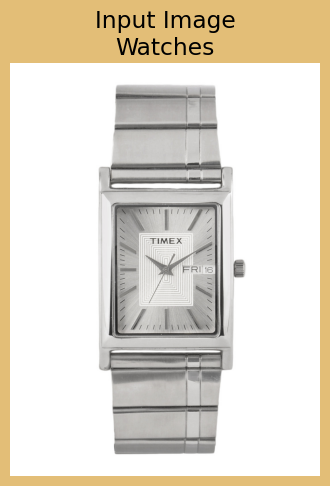

YOU MAY ALSO LIKE


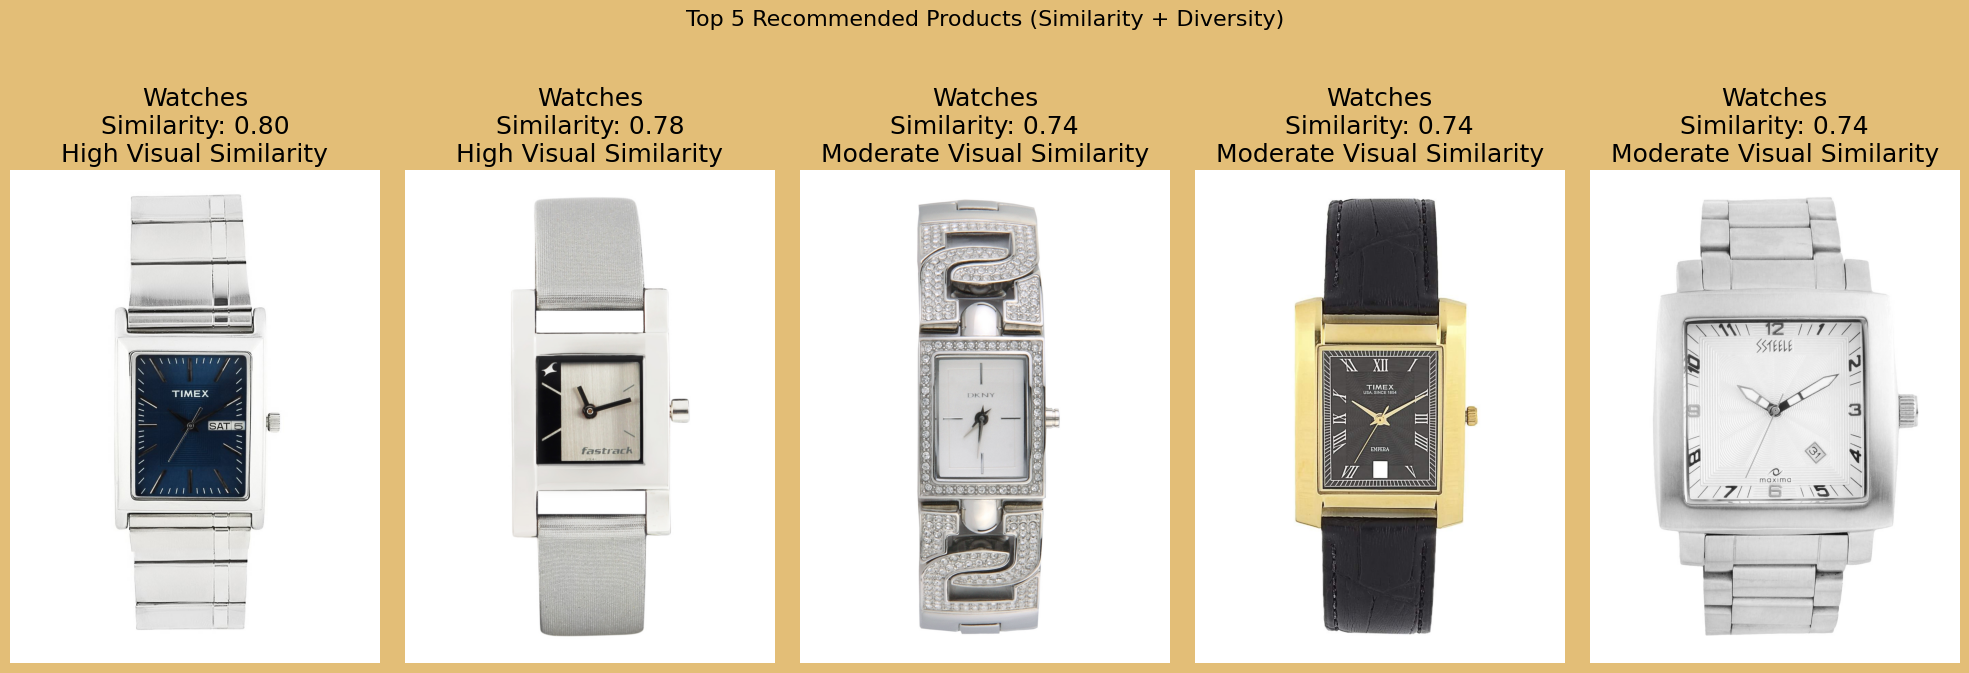

In [109]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

# 🔹 Image folder (kagglehub path)
image_folder = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images"

# 🔹 NEW FEATURE: explanation function
def similarity_reason(score):
    if score > 0.85:
        return "Very High Visual Similarity"
    elif score > 0.75:
        return "High Visual Similarity"
    elif score > 0.65:
        return "Moderate Visual Similarity"
    else:
        return "Low Visual Similarity"

# --------------------------------
# INPUT IMAGE ID
# --------------------------------
custom_id = input("Enter an image ID from the dataset (e.g. 15979): ")

# Find index in test set
matches = np.where(test_ids == custom_id)[0]

if len(matches) == 0:
    print("❌ ID not found in test set.")

else:
    index = matches[0]
    testclasslabel = test_labels[index]

    print("INPUT IMAGE")
    print("ID:", custom_id, "| Label:", testclasslabel)

    # 🔹 Show INPUT image
    input_img_path = os.path.join(image_folder, f"{custom_id}.jpg")
    input_img = cv2.imread(input_img_path)

    if input_img is not None:
        input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(4, 6))
        plt.imshow(input_img)
        plt.title(f"Input Image\n{testclasslabel}")
        plt.axis("off")
        plt.show()
    else:
        print("❌ Input image not found.")

    # --------------------------------
    # RECOMMENDATION LOGIC
    # --------------------------------
    query_vector = test_features[index].reshape(1, -1)
    similarities = cosine_similarity(query_vector, train_features).flatten()

    # 🔥 Similarity + Diversity (NEW FEATURE)
    sorted_idx = similarities.argsort()[::-1]

    top_similar = sorted_idx[:2]       # very similar
    mid_similar = sorted_idx[10:13]    # slightly different

    top_indices = np.concatenate([top_similar, mid_similar])

    # --------------------------------
    # DISPLAY RECOMMENDATIONS
    # --------------------------------
    print("YOU MAY ALSO LIKE")
    fig, axs = plt.subplots(1, 5, figsize=(20, 8))

    shown = 0
    for rec_index in top_indices:
        if shown >= 5:
            break

        img_id = train_ids[rec_index]
        img_path = os.path.join(image_folder, f"{img_id}.jpg")

        img = cv2.imread(img_path)
        if img is None:
            continue  # safely skip missing images

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        score = similarities[rec_index]
        reason = similarity_reason(score)

        axs[shown].imshow(img)
        axs[shown].set_title(
            f"{train_labels[rec_index]}\nSimilarity: {score:.2f}\n{reason}",
            fontsize=18
        )
        axs[shown].axis("off")

        shown += 1

    plt.suptitle("Top 5 Recommended Products (Similarity + Diversity)", fontsize=16)
    plt.tight_layout()
    plt.show()


In [80]:
import numpy as np

print("✅ Try one of these valid test IDs:")
print(np.random.choice(test_ids, 5, replace=False))


✅ Try one of these valid test IDs:
['46473' '16332' '31322' '44724' '42676']


Saving images.jfif to images (3).jfif
✅ Uploaded: images (3).jfif


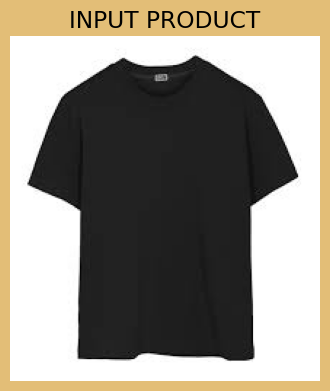

🛍️ You may also like:


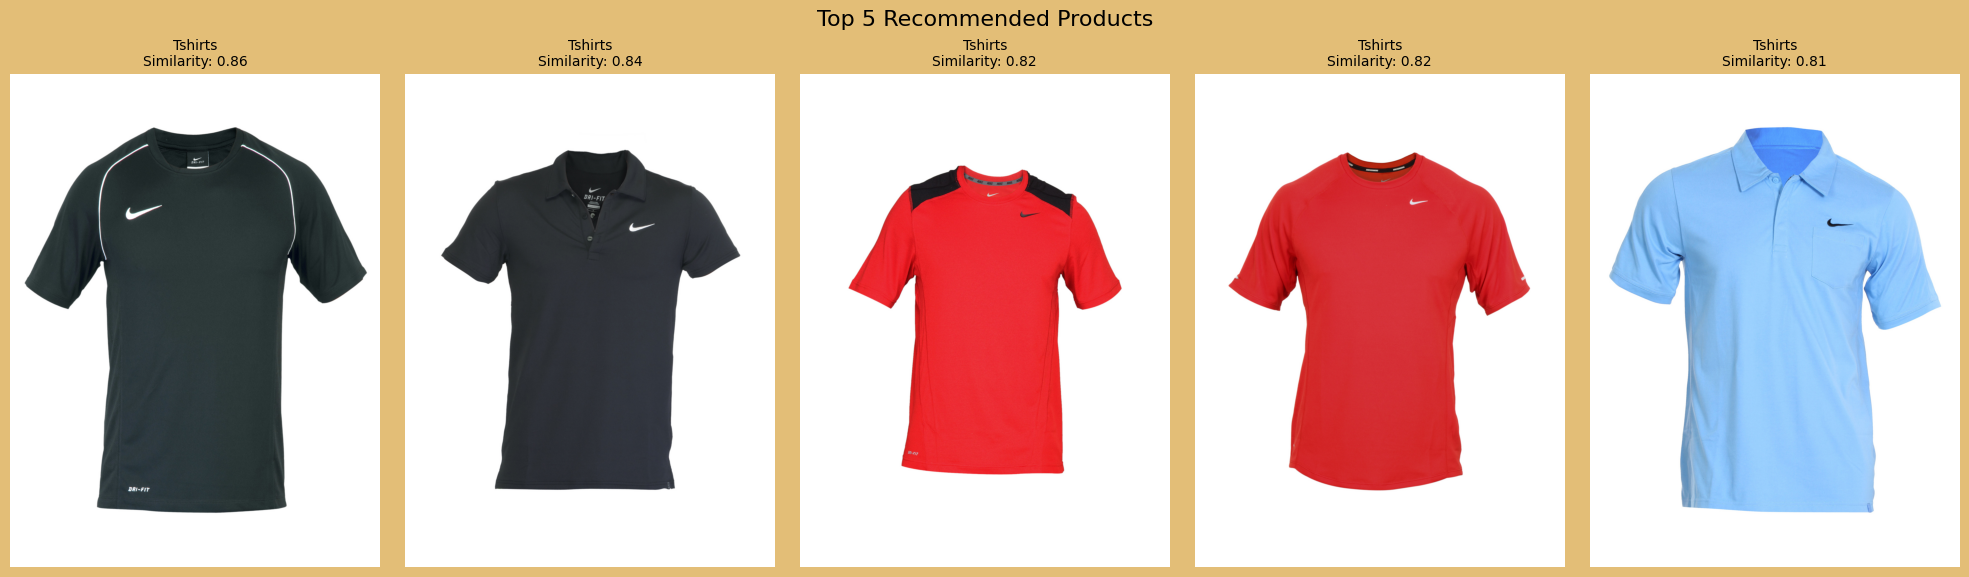

In [107]:
from google.colab import files
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# --------------------------------
# ASSUMPTIONS (already done earlier)
# --------------------------------
# model, preprocess, train_features, train_labels, train_ids are available

image_folder = "/root/.cache/kagglehub/datasets/paramaggarwal/fashion-product-images-dataset/versions/1/fashion-dataset/images"

# --------------------------------
# STEP 1: Upload Image
# --------------------------------
uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]
print(f"✅ Uploaded: {uploaded_filename}")

# --------------------------------
# STEP 2: Preprocess Uploaded Image
# --------------------------------
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("❌ Image not found or unreadable")

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))
    img_preprocessed = preprocess(img_resized)
    img_preprocessed = np.expand_dims(img_preprocessed, axis=0)

    return img_rgb, img_preprocessed

# Get original image (for display) + preprocessed image (for model)
original_img, query_image = preprocess_image(uploaded_filename)

# --------------------------------
# STEP 3: SHOW INPUT IMAGE FIRST ✅
# --------------------------------
plt.figure(figsize=(4, 6))
plt.imshow(original_img)
plt.title("INPUT PRODUCT")
plt.axis("off")
plt.show()

# --------------------------------
# STEP 4: Extract Features
# --------------------------------
query_vector = model.predict(query_image, verbose=0)

# --------------------------------
# STEP 5: Similarity Calculation
# --------------------------------
similarities = cosine_similarity(query_vector, train_features).flatten()
top_indices = similarities.argsort()[-5:][::-1]

# --------------------------------
# STEP 6: Show Top-5 Recommendations + Scores (SAFE)
# --------------------------------
print("🛍️ You may also like:")

fig, axs = plt.subplots(1, 5, figsize=(20, 6))
shown = 0

for rec_index in top_indices:
    if shown >= 5:
        break

    img_id = train_ids[rec_index]
    label = train_labels[rec_index]
    score = similarities[rec_index]

    img_path = os.path.join(image_folder, f"{img_id}.jpg")
    img = cv2.imread(img_path)

    # 🔒 Safety check for missing images
    if img is None:
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    ax = axs[shown]
    ax.imshow(img)
    ax.set_title(f"{label}\nSimilarity: {score:.2f}", fontsize=10)
    ax.axis("off")

    shown += 1

plt.suptitle("Top 5 Recommended Products", fontsize=16)
plt.tight_layout()
plt.show()


head(6000) for demo otherwise 35k images would take hours

In [92]:
print("Train features shape:", train_features.shape)
print("Train labels shape:", train_labels.shape)
print("Train IDs shape:", train_ids.shape)


Train features shape: (4800, 2048)
Train labels shape: (4800,)
Train IDs shape: (4800,)
